<a href="https://colab.research.google.com/github/itsmepriyabrata/priyabrata_ai_python/blob/main/GRU_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Dense, Embedding, Concatenate, Input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample data related to tourism destinations in Odisha
# Features: [Scenic Beauty, Adventure, Culture]
destinations = {
    'Puri': [0.8, 0.2, 0.6],
    'Konark': [0.9, 0.5, 0.4],
    'Bhubaneswar': [0.7, 0.3, 0.8],
    'Chilika': [0.6, 0.7, 0.3],
    'Simlipal': [0.9, 0.9, 0.2],
    'Rourkela': [0.5, 0.8, 0.3],
    'Cuttack': [0.6, 0.4, 0.7],
    'Koraput': [0.7, 0.6, 0.5],
    'Sambalpur': [0.4, 0.7, 0.4],
    'Mayurbhanj': [0.8, 0.8, 0.6]
}

destinations_list = list(destinations.keys())
features = np.array(list(destinations.values()))

# User preferences (example)
user_preferences = np.array([0.8, 0.5, 0.7])  # Example preferences: [Scenic Beauty, Adventure, Culture]

tokenizer = Tokenizer()

tokenizer.fit_on_texts(destinations_list)

destinations_sequences = tokenizer.texts_to_sequences(destinations_list)

max_sequence_length = max(len(seq) for seq in destinations_sequences)
destinations_padded = pad_sequences(destinations_sequences, maxlen=max_sequence_length, padding='post')

destination_input = Input(shape=(max_sequence_length,))
preference_input = Input(shape=(3,))

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_sequence_length)(destination_input)

gru_layer = GRU(50, return_sequences=False)(embedding_layer)

concatenated = Concatenate()([gru_layer, preference_input])

output = Dense(3, activation='softmax')(concatenated)

model = Model(inputs=[destination_input, preference_input], outputs=output)

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

fake_labels = np.random.randint(2, size=(len(destinations_list), 3))
model.fit([destinations_padded, np.tile(user_preferences, (len(destinations_list), 1))], fake_labels, epochs=50, verbose=1)

predicted_scores = model.predict([destinations_padded, np.tile(user_preferences, (len(destinations_list), 1))])

sorted_indices = np.argsort(np.sum(predicted_scores, axis=1))[::-1]
recommended_destinations = [destinations_list[i] for i in sorted_indices]

print("Recommended Destinations:")
for destination in recommended_destinations:
    print(destination)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.2877 - accuracy: 0.8000
Epoch 2/50
1/1 [==============================] - 0s 18ms/step - loss: 0.2871 - accuracy: 0.8000
Epoch 3/50
1/1 [==============================] - 0s 15ms/step - loss: 0.2866 - accuracy: 0.8000
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 0.2860 - accuracy: 0.8000
Epoch 5/50
1/1 [==============================] - 0s 12ms/step - loss: 0.2855 - accuracy: 0.8000
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 0.2849 - accuracy: 0.8000
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.2843 - accuracy: 0.8000
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 0.2838 - accuracy: 0.8000
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.2832 - accuracy: 0.8000
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.2825 - accuracy: 0.8000
Epoch 11/50
1/1 [==============

Epoch 1/50
25/25 [==============================] - 10s 160ms/step - loss: 1937409.0000 - val_loss: 1939823.2500
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 1934630.8750 - val_loss: 1934913.0000
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 1924028.6250 - val_loss: 1916505.6250
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 1905789.5000 - val_loss: 1903686.8750
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 1897238.3750 - val_loss: 1897568.0000
Epoch 6/50
25/25 [==============================] - 0s 11ms/step - loss: 1891726.5000 - val_loss: 1892494.5000
Epoch 7/50
25/25 [==============================] - 0s 9ms/step - loss: 1886886.2500 - val_loss: 1887853.1250
Epoch 8/50
25/25 [==============================] - 0s 13ms/step - loss: 1882377.6250 - val_loss: 1883463.0000
Epoch 9/50
25/25 [==============================] - 0s 7ms/step - loss: 1878075.0000 - val_loss: 1879238.7500
Epoch

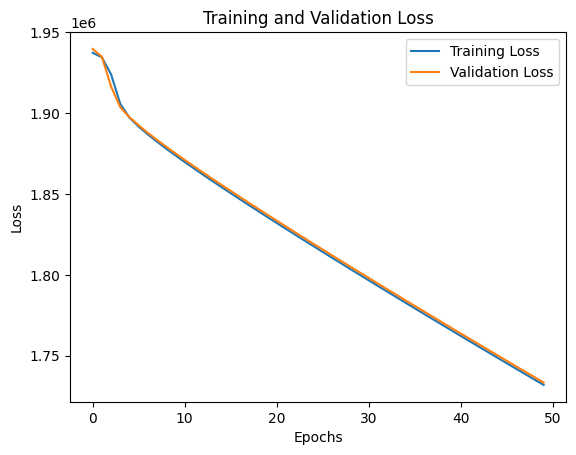

7/7 [==============================] - 0s 3ms/step - loss: 1733433.2500
Test Loss: 1733433.25
7/7 [==============================] - 0s 2ms/step


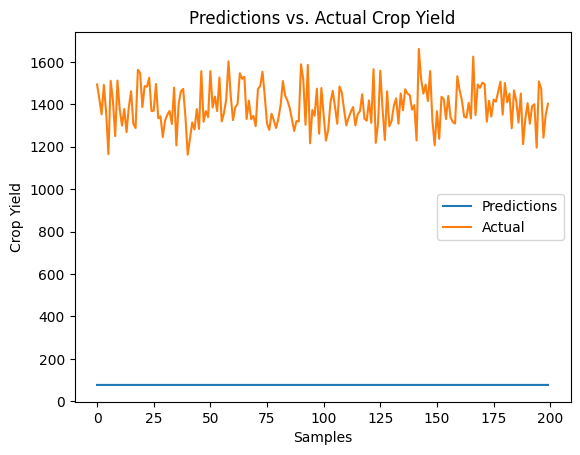

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 1000

temperature = np.random.uniform(low=25, high=40, size=(num_samples,))
rainfall = np.random.uniform(low=50, high=500, size=(num_samples,))
humidity = np.random.uniform(low=40, high=80, size=(num_samples,))

crop_yield = 1000 + (temperature * 10) + (rainfall * 0.5) - (humidity * 1.2) + np.random.normal(scale=50, size=(num_samples,))

data = pd.DataFrame({'Temperature': temperature, 'Rainfall': rainfall, 'Humidity': humidity, 'Crop_Yield': crop_yield})

X = data[['Temperature', 'Rainfall', 'Humidity']].values
y = data['Crop_Yield'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

predictions = model.predict(X_test)

plt.plot(predictions, label='Predictions')
plt.plot(y_test, label='Actual')
plt.xlabel('Samples')
plt.ylabel('Crop Yield')
plt.title('Predictions vs. Actual Crop Yield')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.model_selection import train_test_split

# Sample data related to environmental monitoring in Odisha
# Features: [Temperature (°C), Humidity (%), Air Quality Index]
# Labels: Environmental Condition (0: Normal, 1: Abnormal)
X = np.array([[28.5, 60, 35], [30.0, 55, 40], [27.0, 70, 45], [29.5, 58, 55], [26.8, 75, 60],
              [31.0, 52, 50], [29.8, 56, 65], [28.3, 62, 70], [29.0, 58, 75], [30.2, 50, 80],
              [28.4, 63, 55], [29.7, 57, 60], [27.9, 68, 65], [29.2, 59, 70], [30.1, 54, 75]])
y = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)


Epoch 1/50
2/2 [==============================] - 3s 530ms/step - loss: 0.7110 - accuracy: 0.6667 - val_loss: 1.0551 - val_accuracy: 0.0000e+00
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.6584 - accuracy: 0.6667 - val_loss: 1.0346 - val_accuracy: 0.3333
Epoch 3/50
2/2 [==============================] - 0s 32ms/step - loss: 0.6285 - accuracy: 0.6667 - val_loss: 1.0056 - val_accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - 0s 32ms/step - loss: 0.6086 - accuracy: 0.6667 - val_loss: 0.9728 - val_accuracy: 0.3333
Epoch 5/50
2/2 [==============================] - 0s 33ms/step - loss: 0.5870 - accuracy: 0.6667 - val_loss: 0.9305 - val_accuracy: 0.3333
Epoch 6/50
2/2 [==============================] - 0s 35ms/step - loss: 0.5690 - accuracy: 0.6667 - val_loss: 0.8916 - val_accuracy: 0.3333
Epoch 7/50
2/2 [==============================] - 0s 34ms/step - loss: 0.5555 - accuracy: 0.6667 - val_loss: 0.8574 - val_accuracy: 0.3333
Epoch 8/50
2/2 [======